In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, minimum_filter
import importlib

import keypointDetect
importlib.reload(keypointDetect)
from keypointDetect import *

In [4]:
levels = [-1,0,1,2,3,4]
im = cv2.imread('../data/model_chickenbroth.jpg')

# test gaussian pyramid
im_pyr = createGaussianPyramid(im)
# compute DoG pyramid
DoG_pyr, DoG_levels = createDoGPyramid(im_pyr, levels)
# compute principal curvature
pc_curvature = computePrincipalCurvature(DoG_pyr)

# # save gaussian and DoG pyramids
# gaussian_pyr = displayPyramid(gaussian_pyr)
# cv2.imwrite('results/gaussian-pyramid.png', 255*gaussian_pyr)
# DoG_pyr = displayPyramid(DoG_pyr)
# cv2.imwrite('results/DoG-pyramid.png', 255*DoG_pyr)

th_contrast=0.03
th_r = 12

(-0.5, 195.5, 277.5, -0.5)

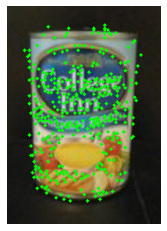

In [5]:
keypoints, gaussian_pyr = DoGdetector(im)
tmp_im = cv2.resize(im, (2*im.shape[1], 2*im.shape[0]))
for point in keypoints:
    cv2.circle(tmp_im, (2*point[0], 2*point[1]), 2, (0, 255, 0), -1)

cv2.imwrite('../results/no-edge-suppresion.png', tmp_im)
plt.imshow(cv2.cvtColor(tmp_im, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [23]:
i,j,k = 44,47,1
test_neighbour = DoG_pyr[i-1:i+2,j-1:j+2,k]
DoG_pyr[i-1:i+2,j-1:j+2,k+1]

array([[-0.01926976, -0.07716072, -0.05424097],
       [-0.01459828, -0.06976315, -0.04364583],
       [-0.01187006, -0.06310448, -0.03401968]], dtype=float32)

In [24]:
test_neighbour

array([[-0.01375541, -0.09573585, -0.05182466],
       [-0.01716089, -0.09670299, -0.0480397 ],
       [-0.0168083 , -0.09210944, -0.03993142]], dtype=float32)